In [641]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.integrate import odeint
import scipy
import random

# Derivative plotting example

In [283]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

In [192]:
x = np.arange(-6,6,.1)
def f(x):
    """generic function"""
    return np.cos(x)+x*np.sin(x)

def f_dot(x):
    """derivative of the generic function"""
    return x*np.cos(x)

In [198]:
"Evaluate each function for x = [-6,6]"
n_points = 1000
x_in = -6
x_fin = -x_in
x = np.linspace(x_in, x_fin, n_points)
y = f(x)
y_dot = f_dot(x)

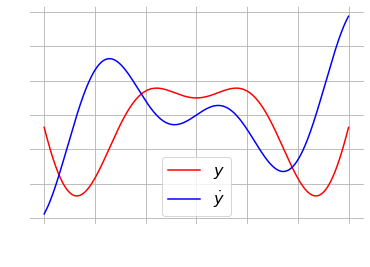

In [42]:
"Plot"
fig1 = plt.figure()
plt.plot(x,y,'-r')
plt.plot(x,y_dot,'b-')
plt.grid()
plt.xlabel('x',fontsize = 16)
plt.legend([r'$y$',r'$\dot{y}$'],fontsize=16)

# Finite Differences

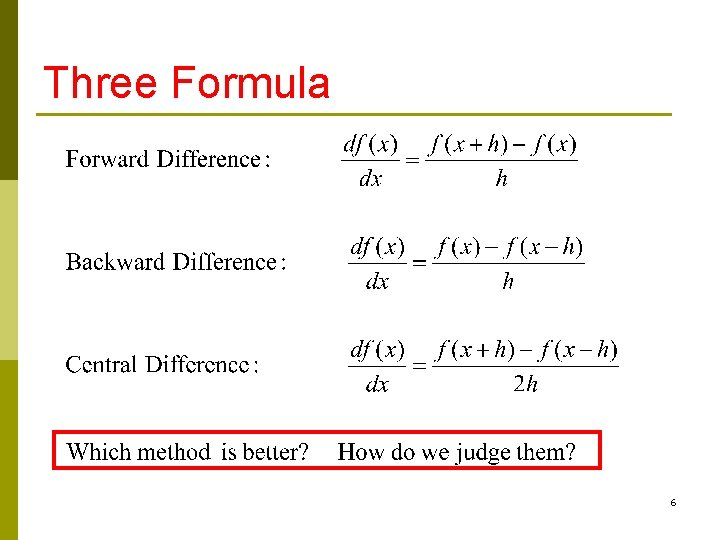

## Example

In [372]:
class Finite_Difference:
    """Finite difference class"""
    def __init__(self, f, h):
        """Initialize function to differentiate and step size"""
        # function to differentiate
        self.f = f
        # step size
        self.h = h
        
    def forward_diff(self,x):
        """Forward difference implementation"""
        # array to store results
        f_dot = np.array([])
        # initialize first index
        x_k = x[0]
        # array to store x values
        x_array = []
        # stop when the second to last x value is reached
        while x_k < x[-1]:
            x_array.append(x_k)
            # Evaluate derivative
            f_dot_eval = (self.f(x_k+self.h) - self.f(x_k))/self.h
            # Store
            f_dot = np.append(f_dot,f_dot_eval)
            # Iterate
            x_k += self.h
        return x_array,f_dot
    
    def backward_diff(self,x):
        """Backward difference implementation"""
        # array to store results
        f_dot = np.array([])
        # initialize first index as second array element
        x_k = x[1]
        x_array = []
        # stop when the last x value is reached
        while x_k <= x[-1]:
            x_array.append(x_k)
            # Evaluate derivative
            f_dot_eval = (self.f(x_k) - self.f(x_k-self.h))/self.h
            # Store
            f_dot = np.append(f_dot,f_dot_eval)
            # Iterate
            x_k += self.h
        return x_array,f_dot
    
    def central_diff(self,x):
        """Central difference implementation"""
        # array to store results
        f_dot = np.array([])
        # initialize first index
        x_k = x[0]
        # array to store x values
        x_array = []
        # stop when the last x value is reached
        while x_k <= x[-1]:
            x_array.append(x_k)
            # Evaluate derivative
            f_dot_eval = (self.f(x_k+self.h) - self.f(x_k-self.h))/(2*self.h)
            # Store
            f_dot = np.append(f_dot,f_dot_eval)
            # Iterate
            x_k += self.h
        return x_array,f_dot

In [373]:
# Instantiate class
finite_diff = Finite_Difference(f,h=0.25)

In [374]:
# Evalaute with forward, backward, and central difference
x_forward,forward_diff_ex = finite_diff.forward_diff(x)
x_backward,backward_diff_ex = finite_diff.backward_diff(x)
x_central,central_diff_ex = finite_diff.central_diff(x)

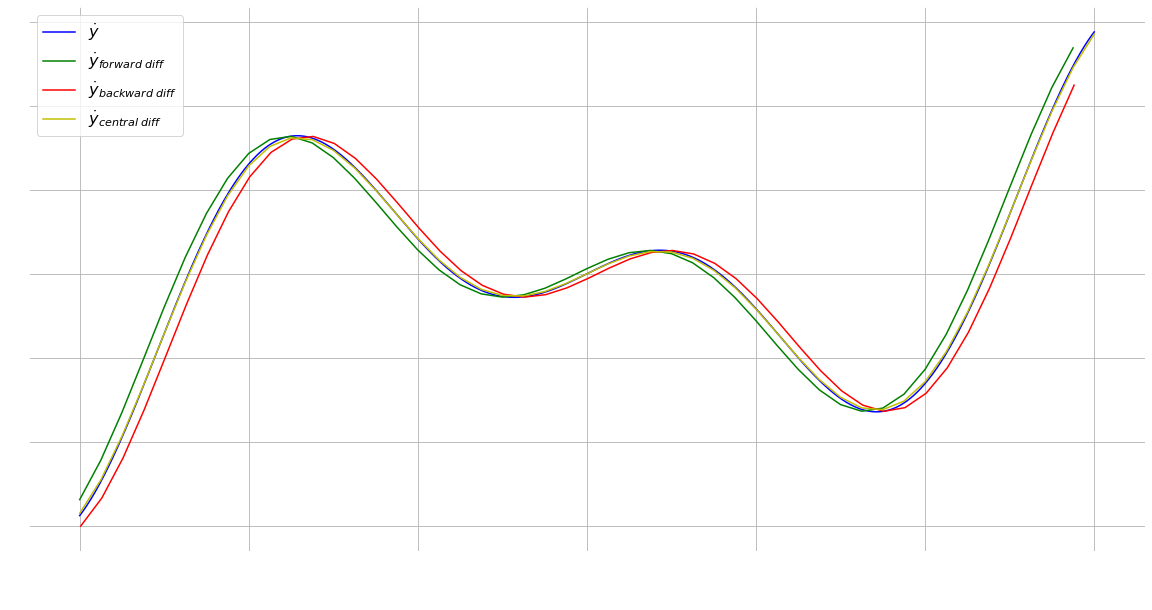

In [375]:
"Plot"
fig2 = plt.figure()
plt.rcParams["figure.figsize"] = (20,10)
#plt.plot(x,y,'-r')
plt.plot(x,y_dot,'b-')
plt.plot(x_forward,forward_diff_ex,'g-')
plt.plot(x_backward,backward_diff_ex,'r-')
plt.plot(x_central,central_diff_ex,'y-')
plt.grid()
plt.xlabel('x',fontsize = 32)
# r'$y$''
plt.legend([r'$\dot{y}$',r'$\dot{y}_{forward \; diff}$',r'$\dot{y}_{backward \; diff}$',r'$\dot{y}_{central \; diff}$'],fontsize=16)

# Integration

#### Euler Method - RK1
$f(x_{k} + h) = f(x_{k}) + h f'(x_{k})$

#### RK 2
$f(t_{k+1},x_{k+1}) = f(t_{k},x_{k}) + h f'(t_{k}+h/2, x_{k} f'(t_{k},x_{k}))$

#### Backwards
$f(x_{k} - h) = f(x_{k}) - h f'(x_{k})$



In [595]:
class Integration:
    """Integration class"""
    def __init__(self, f_dot, h):
        """Initialize function to integrate and step size"""
        # function to integrate
        self.f_dot = f_dot
        # step size
        self.h = h
        
    def forward_int(self,x,f_0,order=1):
        """Forward difference implementation"""
        # initialize first index
        x_k = x[0]
        f_k = f_0
        # array to store x values
        x_array = []
        # array to store results
        f = np.array([])
        # stop when the second to last x value is reached
        while x_k < x[-1]:
            # Store
            f = np.append(f,f_k)
            x_array.append(x_k)
            # Evaluate integral
            k_1 = self.f_dot(f_k, x_k)
            k_2 = self.f_dot(self.h/2.*k_1 + f_k, x_k+self.h/2.)
            k_3 = self.f_dot(self.h/2.*k_2 + f_k, x_k+self.h/2.)
            k_4 = self.f_dot(self.h*k_3 + f_k, x_k+self.h)
            # determine estimate for f(x) using rk of order n
            if order == 1:
                f_eval = f_k + self.h*k_1
            elif order == 2:
                f_eval = f_k + self.h*k_2
            elif order == 4:
                m = (k_1 + 2.*k_2 + 2.*k_3 + k_4)/6.
                f_eval = f_k + m*self.h
            
            # Iterate
            x_k += self.h
            f_k = f_eval
        return x_array,f
    
    def backward_int(self,x,f_f):
        """Forward difference implementation"""
        # initialize first index
        x_k = x[-1]
        f_k = f_f
        # array to store x values
        x_array = []
        # array to store results
        f = np.array([])
        # stop when the second to last x value is reached
        while x_k > x[0]:
            # Store
            f = np.append(f,f_k)
            x_array.append(x_k)
            # Evaluate integral
            f_eval = f_k - self.h*self.f_dot(f_k,x_k)
            # Iterate
            x_k -= self.h
            f_k = f_eval
        return x_array,f
    
    def central_int(self,x,f_0):
        """Forward difference implementation"""
        # initialize first index
        x_k = x[0]
        f_k = f_0
        # array to store x values
        x_array = []
        # array to store results
        f = np.array([])
        # stop when the second to last x value is reached
        while x_k <= x[-1]:
            # Store
            f = np.append(f,f_k)
            x_array.append(x_k)
            # Evaluate integral
            f_eval = f_k + 2*self.h*self.f_dot(f_k,x_k)
            # Iterate
            x_k += self.h
            f_k = f_eval
        return x_array,f
    
def f_dot(x,t):
    return -2*x


In [596]:
# Problem defn
y0 = 3
t0 = 0
tf = 2

time = np.linspace(t0,tf)
y_true = odeint(f_dot,y0,time)
yf = y_true[-1]

In [597]:
# Instantiate class
rk = Integration(f_dot,h=0.2)

In [598]:
# Evalaute with forward, backward, and central difference
x_forward,forward_int_ex = rk.forward_int(time,y0)
x_forward_2,forward_int_ex_2 = rk.forward_int(time,y0,order=2)
x_forward_4,forward_int_ex_4 = rk.forward_int(time,y0,order=4)

x_backward,backward_int_ex = rk.backward_int(time,yf)

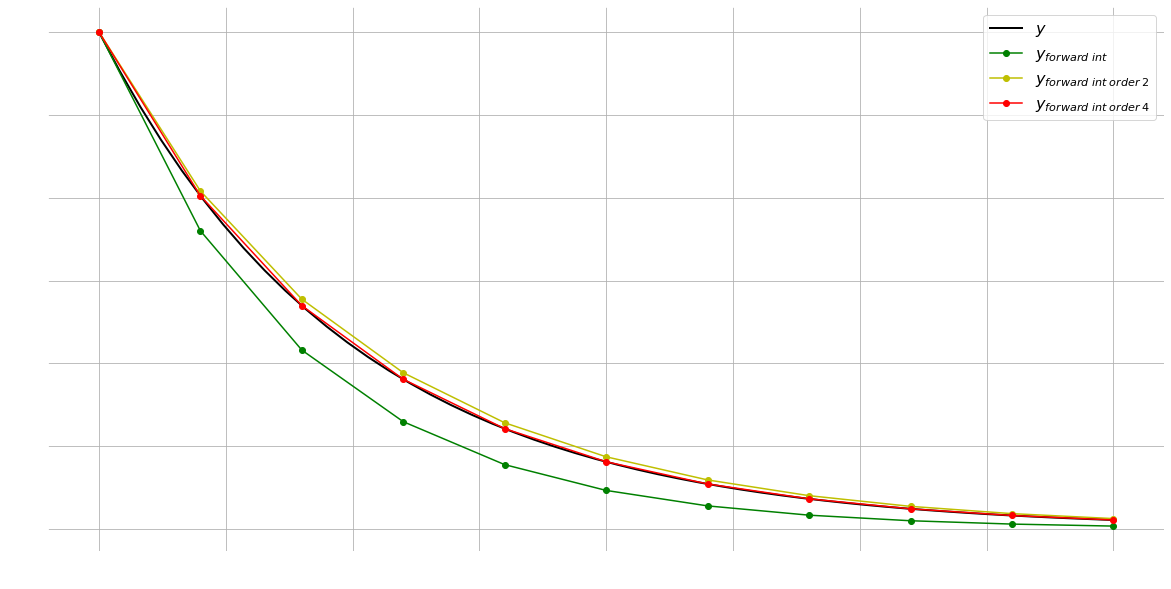

In [599]:
fig3 = plt.figure()
plt.plot(time,y_true,'k-',linewidth = 2)
plt.plot(x_forward,forward_int_ex,'g-o')
plt.plot(x_forward_2,forward_int_ex_2,'y-o')
plt.plot(x_forward_4,forward_int_ex_4,'r-o')

#plt.plot(x_backward,backward_int_ex,'r-o')

plt.grid()
plt.xlabel('time')
plt.ylabel(r'$y(t)$')
plt.legend([r'$y$',r'$y_{forward \; int}$',r'$y_{forward \; int \; order \; 2}$',r'$y_{forward \; int \; order \; 4}$'],fontsize=16)

#### Varying h values plot

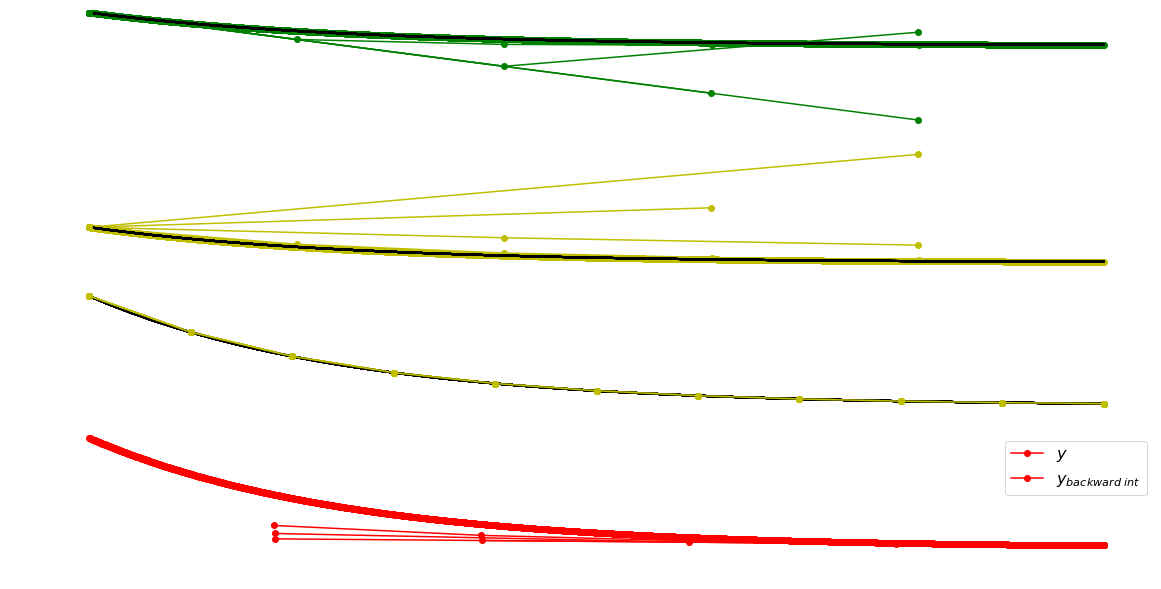

In [600]:
fig, ax = plt.subplots(4)
h = np.linspace(0.001,20)
for h_val in h:
        # Instantiate class
        rk = Integration(f_dot,h=h_val)
        # Evalaute with forward, backward, and central difference
        x_forward,forward_int_ex = rk.forward_int(time,y0)
        x_forward_2,forward_int_ex_2 = rk.forward_int(time,y0,order=2)

        x_backward,backward_int_ex = rk.backward_int(time,yf)
        
        # true value
        ax[0].plot(time,y_true,'k-',linewidth = 2)
        ax[1].plot(time,y_true,'k-',linewidth = 2)
        ax[2].plot(time,y_true,'k-',linewidth = 2)

        # estimates
        ax[0].plot(x_forward,forward_int_ex,'g-o')
        plt.grid()
        plt.xlabel('time')
        plt.ylabel(r'$y(t)$')
        plt.legend([r'$y$',r'$y_{forward \; int}$'],fontsize=16)
        
        ax[1].plot(x_forward_2,forward_int_ex_2,'y-o')
        plt.grid()
        plt.xlabel('time')
        plt.ylabel(r'$y(t)$')
        plt.legend([r'$y$',r'$y_{forward \; int \; order \; 2}$'],fontsize=16)
        
        ax[2].plot(x_forward_4,forward_int_ex_4,'y-o')
        plt.grid()
        plt.xlabel('time')
        plt.ylabel(r'$y(t)$')
        plt.legend([r'$y$',r'$y_{forward \; int \; order \; 4}$'],fontsize=16)
        
        ax[3].plot(x_backward,backward_int_ex,'r-o')
        plt.grid()
        plt.xlabel('time')
        plt.ylabel(r'$y(t)$')
        plt.legend([r'$y$',r'$y_{backward \; int}$'],fontsize=16)



## Nonlinear pendulum example

In [685]:
def pendulum(theta,t):
    l = 3
    g = 9.81
    x_dot = np.array([theta[1], -g/l*np.sin(theta[0])])
    return x_dot

def pendulum_damped(t,theta):
    l = 3
    g = 9.81
    damp = 0.3
    x_dot = np.array([theta[1], -g/l*np.sin(theta[0]) - damp*theta[1]])
    return x_dot

In [683]:
# Problem defn
y0 = np.array([np.pi/3, 0])
t0 = 0
tf = 15


In [671]:
time = np.linspace(t0,tf)
theta = odeint(pendulum,y0,time)
theta_damped = odeint(pendulum_damped,y0,time)

In [686]:
def RK4(func, X0, t):
    """
    Runge Kutta 4 solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        k1 = func(X[i], t[i])
        k2 = func(X[i] + dt/2. * k1, t[i] + dt/2.)
        k3 = func(X[i] + dt/2. * k2, t[i] + dt/2.)
        k4 = func(X[i] + dt    * k3, t[i] + dt)
        X[i+1] = X[i] + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
    return X

theta_rk = RK4(pendulum, y0, time)

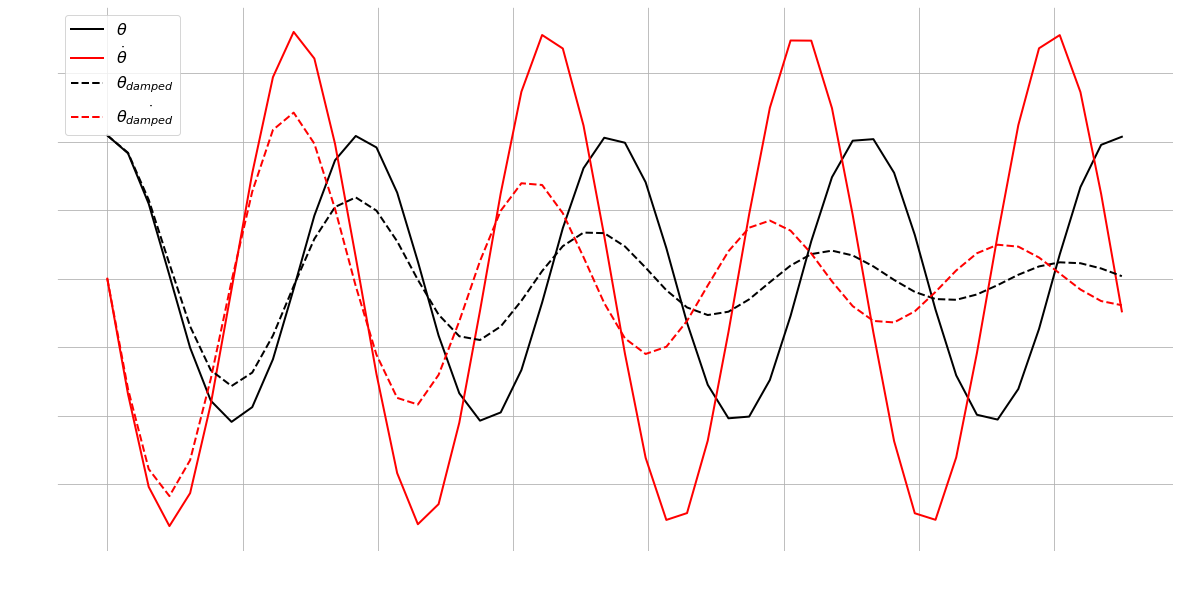

In [605]:
fig5 = plt.figure()
plt.plot(time,theta[:,0],'k-',linewidth = 2)
plt.plot(time,theta[:,1],'r-',linewidth = 2)
plt.plot(time,theta_damped[:,0],'k--',linewidth = 2)
plt.plot(time,theta_damped[:,1],'r--',linewidth = 2)

#plt.plot(x_backward,backward_int_ex,'r-o')

plt.grid()
plt.xlabel('time')
plt.ylabel(r'$y(t)$')
plt.legend([r'$\theta$',r'$\dot{\theta}$',r'$\theta_{damped}$',r'$\dot{\theta_{damped}}$'],fontsize=16)

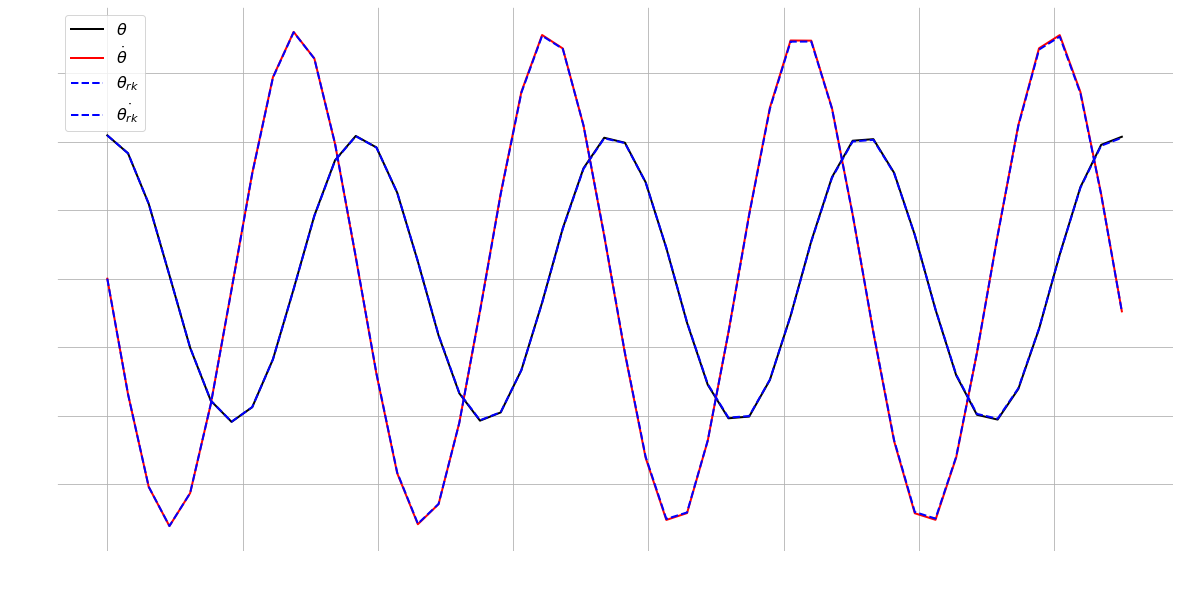

In [690]:
fig5 = plt.figure()
plt.plot(time,theta[:,0],'k-',linewidth = 2)
plt.plot(time,theta[:,1],'r-',linewidth = 2)
plt.plot(time,theta_rk[:,0],'b--',linewidth = 2)
plt.plot(time,theta_rk[:,1],'b--',linewidth = 2)

#plt.plot(x_backward,backward_int_ex,'r-o')

plt.grid()
plt.xlabel('time')
plt.ylabel(r'$y(t)$')
plt.legend([r'$\theta$',r'$\dot{\theta}$',r'$\theta_{rk}$',r'$\dot{\theta_{rk}}$'],fontsize=16)

## Example: Lorenz 63 System

In [694]:
def lorenz63(x,t,sigma,rho,beta):
    x_dot = sigma*(x[1]-x[0])
    y_dot = x[0]*(rho-x[2])-x[1]
    z_dot = x[0]*x[1] - beta*x[2]
    return np.array([x_dot, y_dot, z_dot])

In [695]:
# Problem defn
y0 = np.array([5,5,5])
t0 = 0
tf = 20
sigma = 10
rho = 28
beta = 8/3


In [696]:
time = np.linspace(t0,tf,10000)
deriv = odeint(lorenz63,y0,time,args=(sigma,rho,beta))

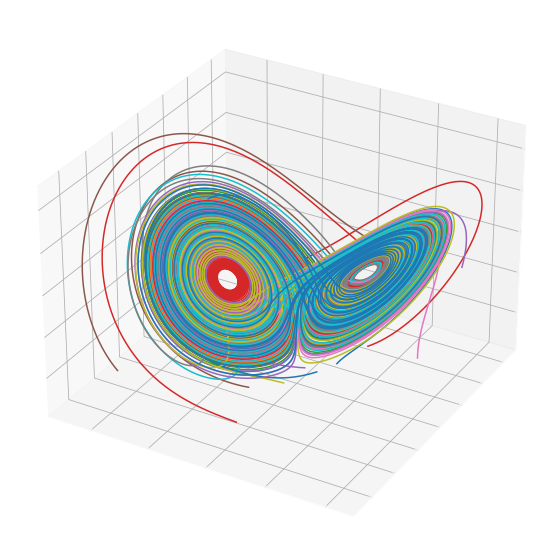

In [697]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(deriv[:,0], deriv[:,1], deriv[:,2])
for i in range(20):
    y0 = np.array([random.randrange(-20,20),random.randrange(-30,30),random.randrange(0,50)])
    deriv = odeint(lorenz63,y0,time,args=(sigma,rho,beta))
    ax.plot(deriv[:,0], deriv[:,1], deriv[:,2])
